Last Updated: 7-25-2017

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Mapping-Tools" data-toc-modified-id="Mapping-Tools-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Mapping Tools</a></div><div class="lev2 toc-item"><a href="#Chloropleth-Maps" data-toc-modified-id="Chloropleth-Maps-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Chloropleth Maps</a></div><div class="lev3 toc-item"><a href="#Choosing-colors" data-toc-modified-id="Choosing-colors-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Choosing colors</a></div><div class="lev2 toc-item"><a href="#Maps-with-Layers" data-toc-modified-id="Maps-with-Layers-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Maps with Layers</a></div><div class="lev3 toc-item"><a href="#Method-1" data-toc-modified-id="Method-1-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Method 1</a></div><div class="lev3 toc-item"><a href="#Method-2:-Using-matplotlib-objects" data-toc-modified-id="Method-2:-Using-matplotlib-objects-122"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Method 2: Using matplotlib objects</a></div><div class="lev2 toc-item"><a href="#GeoPandas-Heatmaps" data-toc-modified-id="GeoPandas-Heatmaps-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>GeoPandas Heatmaps</a></div>

# Mapping Tools

- geopandas provides a high-level interface to the ```matplotlib``` library for making maps.
- Mapping shapes is as easy as using the ```plot()``` method on a ```GeoSeries``` or ```GeoDataFrame```.

Loading some example data:

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (16, 20)


In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [3]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [4]:
# Examine country GeoDataFrame
world.head()

,continent,gdp_md_est,geometry,iso_a3,name,pop_est
0,Asia,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",AFG,Afghanistan,28400000.0
1,Africa,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,AGO,Angola,12799293.0
2,Europe,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",ALB,Albania,3639453.0
3,Asia,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",ARE,United Arab Emirates,4798491.0
4,South America,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,ARG,Argentina,40913584.0


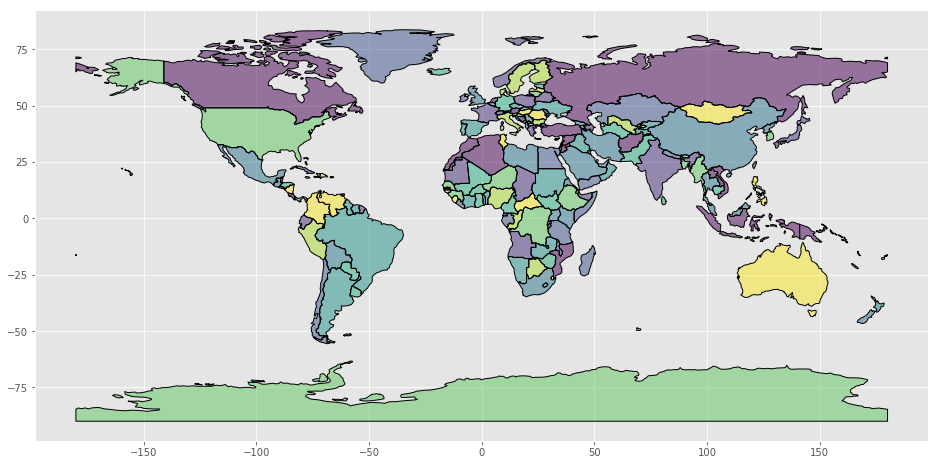

In [5]:
world.plot()
plt.show()

Note that in general, any options one can pass to pyplot in ```matplotlib``` (or style options that work for lines) can be passed to the ```plot()``` method.

## Chloropleth Maps

- geopandas makes it easy to create Chloropleth maps (maps where the color of each shape is based on the value of an associated variable).
- Simply use the plot command with the ```column``` argument set to the column whose values you want used to assign colors.

In [6]:
# Plot by GDP  per capta
world = world[(world.pop_est > 0) & (world.name != "Antarctica")]

In [7]:
world['gpd_per_cap'] = world.gdp_md_est / world.pop_est

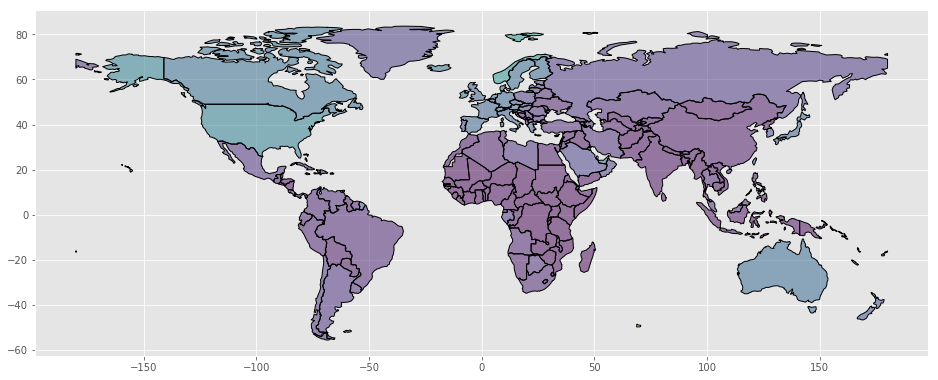

In [8]:
world.plot(column='gpd_per_cap');

### Choosing colors

- One can also modify the colors used by ```plot``` with the ```cmap``` option (for a full list of colormaps, http://matplotlib.org/users/colormaps.html):

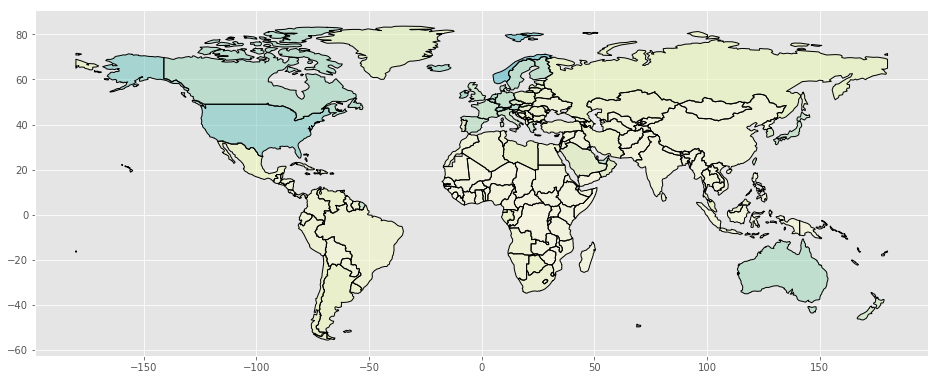

In [9]:
world.plot(column='gpd_per_cap', cmap='YlGnBu');

## Maps with Layers

- There are two strategies for making a map with multiple layers-one more succinct, and one that is a little more flexible.
- Before combining maps, however, remember to always ensure they share a common CRS (so they will allign).

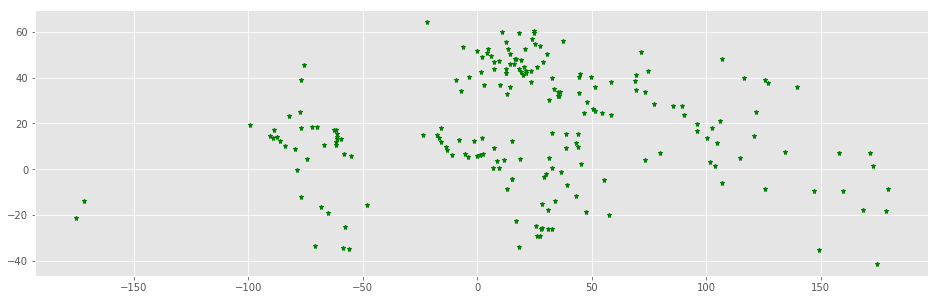

In [10]:
# Look at capitals
# Note use of standard `pyplot` line style options
cities.plot(marker="*", color="green", markersize=5);

- Now we can overlay over country outlines and Yes, there are lots of island capitals apparently in the middle of the ocean!

In [11]:
# check crs
cities = cities.to_crs(world.crs)

### Method 1

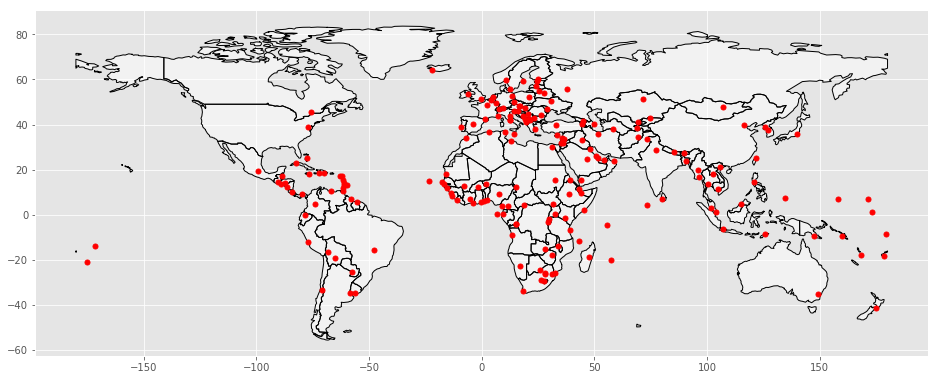

In [12]:
base = world.plot(color='white')
cities.plot(ax=base, marker='o', color='red', markersize=5);

### Method 2: Using matplotlib objects

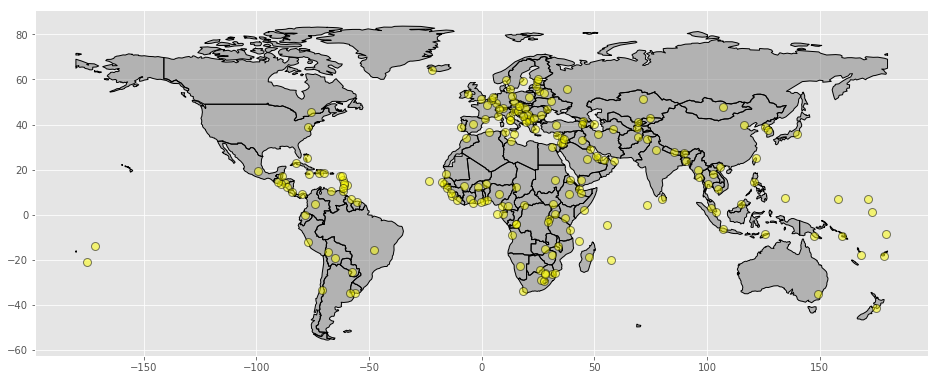

In [17]:
fig, ax = plt.subplots()

# set aspect to equal. This is done automatically 
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.

ax.set_aspect('equal')

world.plot(ax=ax, color='gray')

cities.plot(ax=ax, marker='o', color='red', markersize=8,
            markeredgecolor="black", alpha=0.5, mfc="yellow")

plt.show();

## GeoPandas Heatmaps